### Market Cap Weight

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

market_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0
)

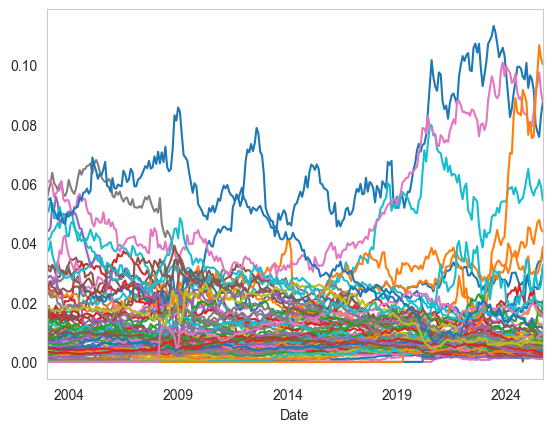

In [21]:
market_weight.resample('ME').last().plot(legend = False)
plt.grid(False)
plt.show()

### forward PER Weight

In [23]:
fper_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'fPER'
)

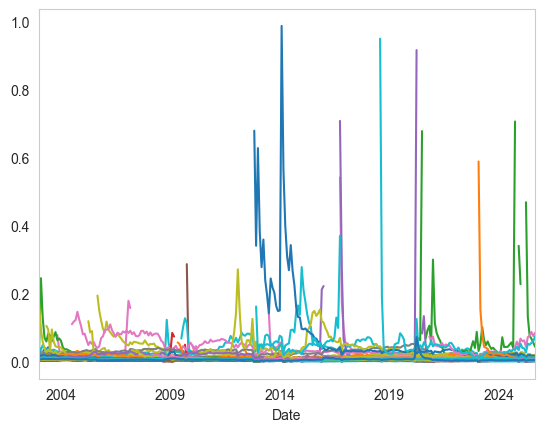

In [24]:
fper_weight.resample('ME').last().plot(legend = None)
plt.grid(False)
plt.show()

### BPR Weight

In [25]:
bpr_weight = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'BPR'
)

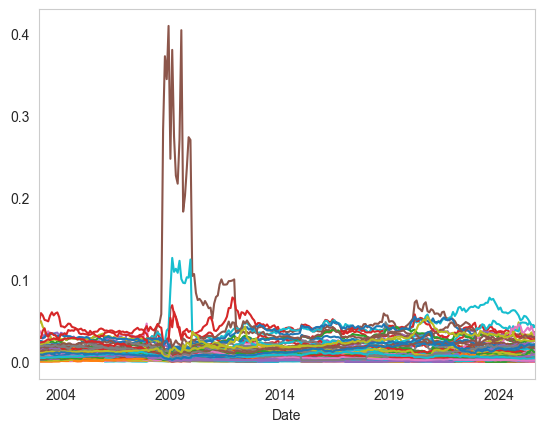

In [27]:
bpr_weight.resample('ME').last().plot(legend = False)
plt.grid(False)
plt.show()

## Allocation

In [28]:
price = pd.read_excel(
    '../data/sp100_stocks_weights.xlsx',
    index_col = 0,
    sheet_name = 'price'
)

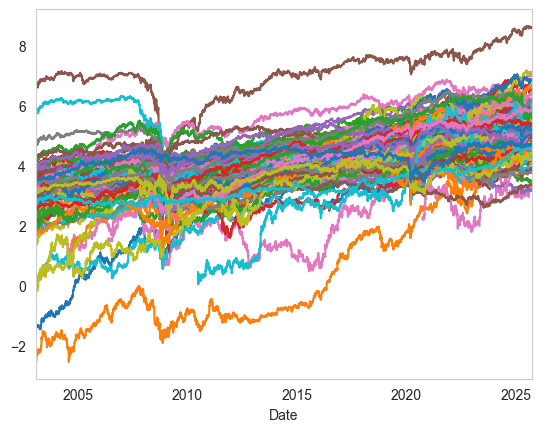

In [30]:
np.log(price).plot(legend = False)
plt.grid(False)
plt.show()

### Markowitz Allocation

In [35]:
price.resample('ME').last().pct_change().loc['2018':]

,AAPL-US,ABBV-US,ABT-US,ACN-US,ADBE-US,AIG-US,AMD-US,AMGN-US,AMT-US,AMZN-US,...,UBER-US,UNH-US,UNP-US,UPS-US,USB-US,V-US,VZ-US,WFC-US,WMT-US,XOM-US
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-0.010636,0.160376,0.089189,0.049709,0.139922,0.072843,0.336576,0.069868,0.035256,0.240807,...,NaN,0.074027,-0.004474,0.068569,0.066443,0.089546,0.021538,0.084226,0.079505,0.043759
2018-02-28,0.063835,0.032169,-0.029440,0.001929,0.046906,-0.102941,-0.118632,-0.012255,-0.056669,0.042316,...,NaN,-0.044852,-0.024345,-0.179940,-0.048652,-0.010384,-0.117070,-0.112040,-0.155630,-0.132417
2018-03-31,-0.058051,-0.182854,-0.006796,-0.046643,0.033233,-0.050924,-0.170107,-0.072319,0.043135,-0.042978,...,NaN,-0.053767,0.032092,0.002394,-0.071008,-0.027005,0.001676,-0.102722,-0.011566,-0.014919
2018-04-30,-0.015020,0.020074,-0.029873,-0.014984,0.025546,0.029033,0.082587,0.023463,-0.061786,0.082078,...,NaN,0.104673,-0.005951,0.084464,-0.000990,0.060692,0.031995,-0.008586,-0.005732,0.042086
2018-05-31,0.130776,0.024754,0.058490,0.030026,0.124910,-0.057321,0.261949,0.029459,0.014740,0.040480,...,NaN,0.021616,0.068323,0.023084,-0.009118,0.030265,-0.034043,0.039069,-0.066913,0.044887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-0.054824,-0.046079,0.021644,0.059067,0.106966,0.038273,0.137442,-0.009418,-0.047735,0.111647,...,0.038884,-0.266211,0.027822,0.023505,0.080565,0.056990,-0.002270,0.053091,0.015116,-0.031525
2025-06-30,0.021509,-0.002633,0.018191,-0.056594,-0.067961,0.011224,0.281496,-0.031126,0.029676,0.070143,...,0.108603,0.033321,0.037986,0.034857,0.038082,-0.027766,-0.015696,0.071409,-0.009522,0.053763
2025-07-31,0.011698,0.018317,-0.072201,-0.106360,-0.075450,-0.093002,0.242495,0.056911,-0.057144,0.067095,...,-0.059486,-0.200051,-0.035249,-0.146424,-0.006409,-0.026982,-0.011786,0.006365,0.002045,0.035622
